In [ ]:
import pandas as pd

# load unemployment data
unemployment_df= pd.read_csv("/content/Unemployment in India.csv")


In [ ]:
unemployment_df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
unemployment_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
# check for missing values

print(unemployment_df.isnull().sum())


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [ ]:
# drop the rows with missing values

unemployment_df.dropna(inplace=True)
print(unemployment_df.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


In [ ]:
# check for duplicates


print(unemployment_df.duplicated().sum())

0


<ipython-input-41-94893e00862e>:5: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  unemployment_df['Date'] = pd.to_datetime(unemployment_df[' Date'])


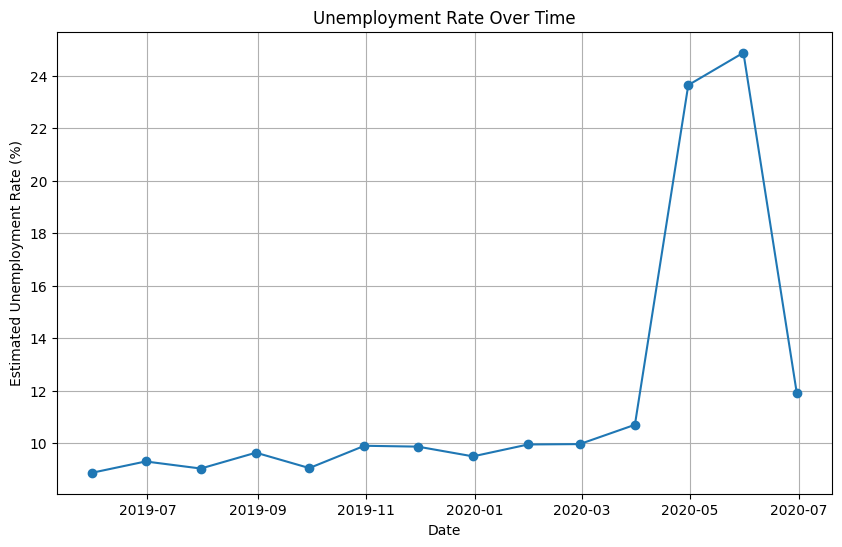

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Date' column to datetime format
unemployment_df['Date'] = pd.to_datetime(unemployment_df[' Date'])

# Calculate the mean unemployment rate over time
mean_unemployment_over_time = unemployment_df.groupby('Date')[' Estimated Unemployment Rate (%)'].mean()

# Create a line plot

plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

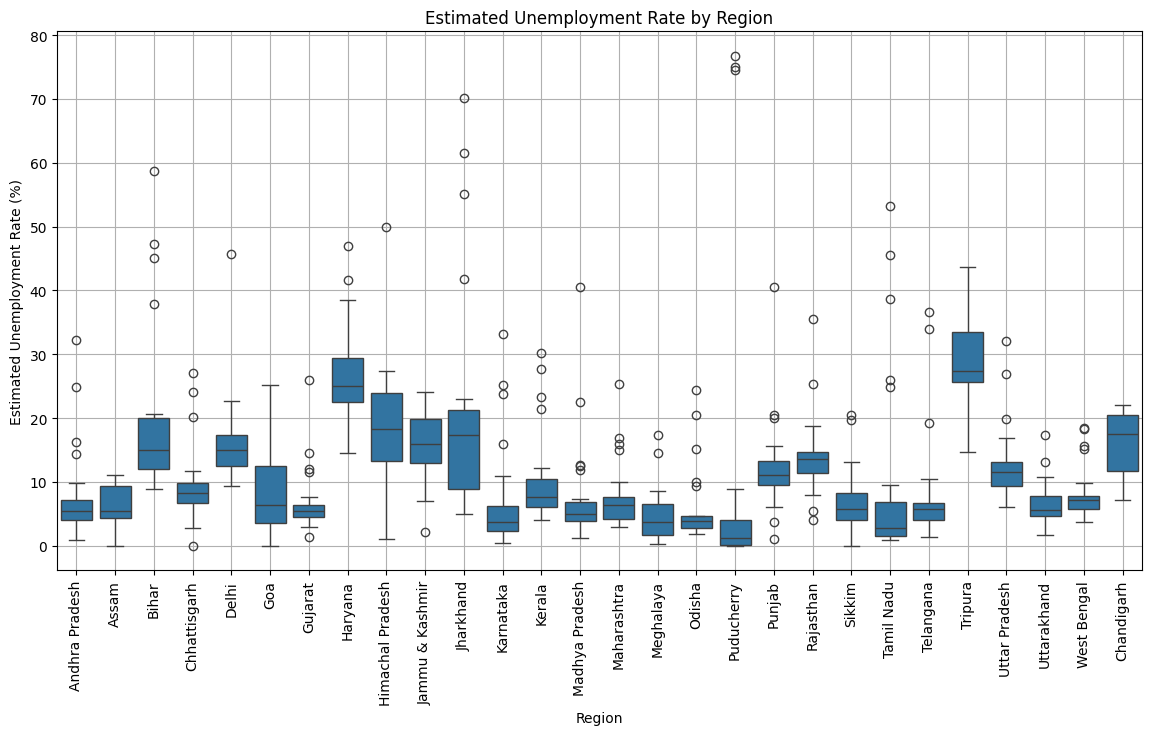

In [ ]:
# unemployement rate by region
plt.figure(figsize=(14, 7))
sns.boxplot(data=unemployment_df, x='Region', y=' Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()



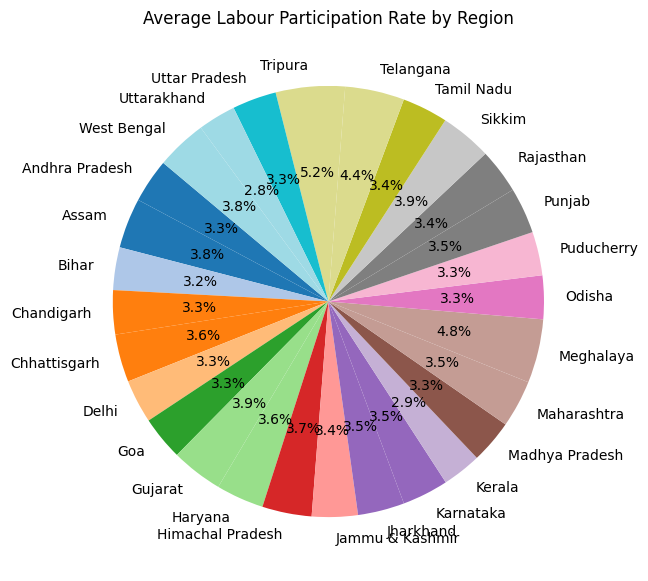

In [ ]:
# Pie Chart for Labor Participation Rate by Region
# Calculate the average labor participation rate by region
region_labor_participation = unemployment_df.groupby('Region')[' Estimated Labour Participation Rate (%)'].mean()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
region_labor_participation.plot.pie(autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.title('Average Labour Participation Rate by Region')
plt.ylabel('')  # Hide the y-label
plt.show()


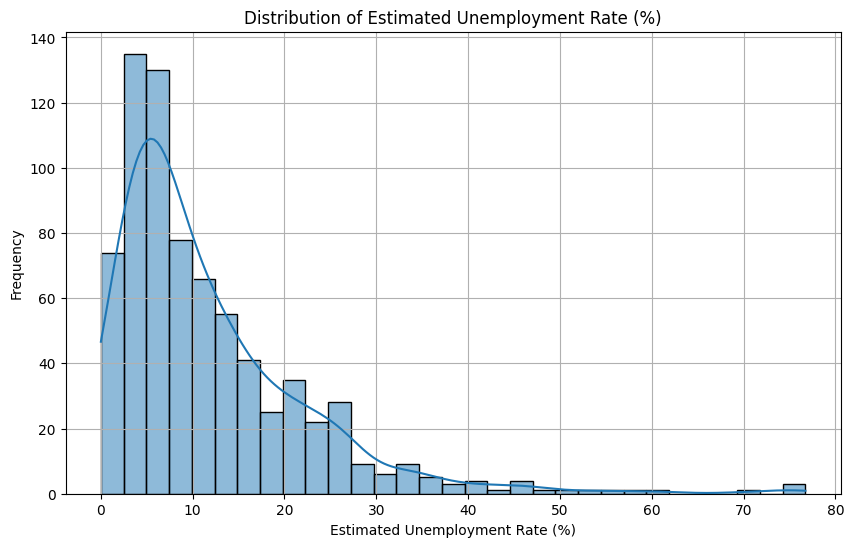

In [ ]:
# distribution of Estimated Unemployment Rate
plt.figure(figsize=(10, 6))
sns.histplot(unemployment_df[' Estimated Unemployment Rate (%)'], kde=True)
plt.title('Distribution of Estimated Unemployment Rate (%)')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


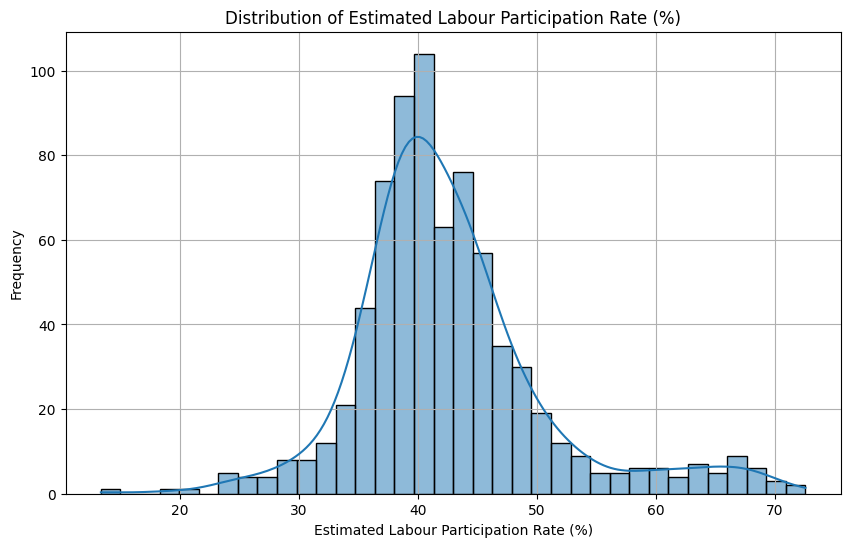

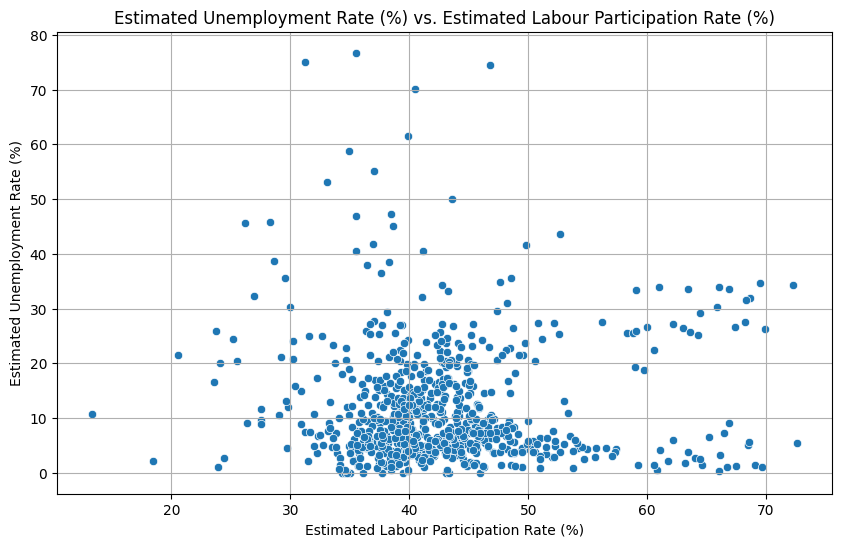

In [ ]:
# Distribution of Estimated Labour Participation Rate (%)
plt.figure(figsize=(10, 6))
sns.histplot(unemployment_df[' Estimated Labour Participation Rate (%)'], kde=True)
plt.title('Distribution of Estimated Labour Participation Rate (%)')
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Scatter plot of Unemployment Rate vs. Labour Participation Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Estimated Labour Participation Rate (%)', y=' Estimated Unemployment Rate (%)', data=unemployment_df)
plt.title('Estimated Unemployment Rate (%) vs. Estimated Labour Participation Rate (%)')
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True)
plt.show()


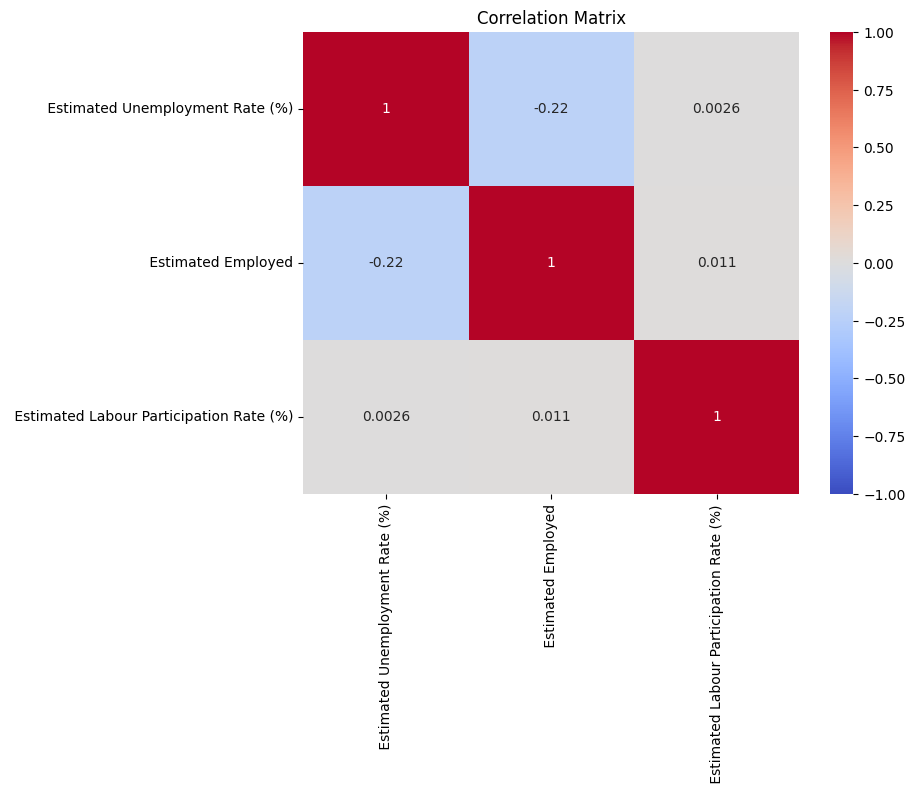

In [ ]:
# correlation matrix
# Calculate the correlation matrix
correlation_matrix = unemployment_df[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

